In [1]:
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def readGraphFromFile(filename):
     return nx.read_graphml(filename)

In [3]:
def drawGraph(graph):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=400, font_size=10)
    plt.show()

In [4]:
def longestSimplePath(graph):
    longestPath = []

    totalNodes = len(graph)
    updateInterval = max(totalNodes // 100, 1)

    # Explore each node as a starting point using a stack
    with tqdm(total=totalNodes) as pbar:
        for node in nx.nodes(graph):
            stack = [(node, [node])]  # (node, path to node)
            while stack:
                currentNode, currentPath = stack.pop()
                if len(currentPath) > len(longestPath):
                    longestPath = currentPath[:]

                for neighbor in graph[currentNode]:
                    if neighbor not in currentPath:
                        newPath = currentPath + [neighbor]
                        stack.append((neighbor, newPath))

            pbar.update()  # Update progress bar after exploring each starting node

    return longestPath


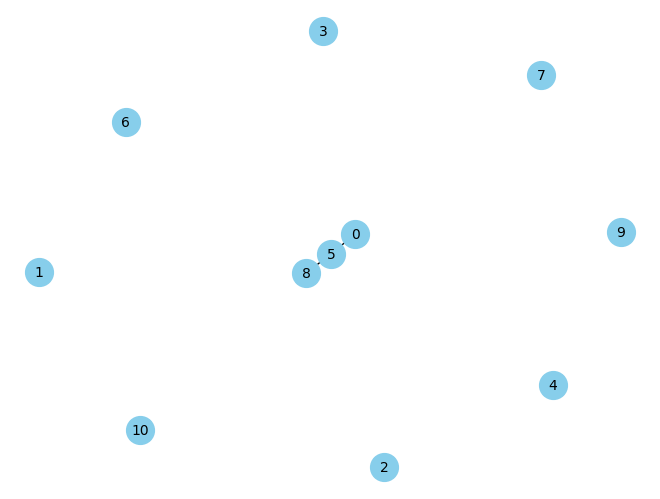

100%|███████████████████████████████████████| 11/11 [00:00<00:00, 166560.81it/s]

Elements of longest simple path: ['0', '5', '8']
Longest simple path:  3


In [7]:
filename = 'random_graph.graphml'
graph = readGraphFromFile(filename) 
drawGraph(graph)
solution = longestSimplePath(graph)
#print("Graph:", graph)
print("Elements of longest simple path:", solution)
print("Longest simple path: ", len(solution))